In [1]:
from diffusers import AutoPipelineForInpainting
import torch

pipe = AutoPipelineForInpainting.from_pretrained("diffusers/stable-diffusion-xl-1.0-inpainting-0.1")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

In [4]:
from PIL import Image


image = Image.open("assets/friends.jpeg")

In [3]:
import numpy as np
import matplotlib.pyplot as plt


bboxes = np.array([
    [184,199, 317,343],
    [396,132, 503,237],
    [557,223, 679,355],
    [799,260, 904,414],
    [927,39, 1055,185],
    [1115,218, 1204,346],
], dtype=np.uint16) 

mask = np.zeros_like(image)
for bbox in bboxes:
    x1,y1,x2,y2 = bbox
    mask[y1:y2,x1:x2] = 255

fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(image)
ax[1].imshow(mask)


NameError: name 'image' is not defined

In [ ]:

#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
prompt = "Change the gender of the faces in the image"

mask_pil = Image.fromarray(mask)

res = pipe(prompt=prompt, negative_prompt="disfigured, malformed, distorted, bad quality, blurred", guidance_scale=9, num_inference_steps=80, image=image, mask_image=mask_pil)

RuntimeError: "LayerNormKernelImpl" not implemented for 'Half'

In [13]:
image_final = res.images[0]
image_final.save("assets/inpainteddd.png")

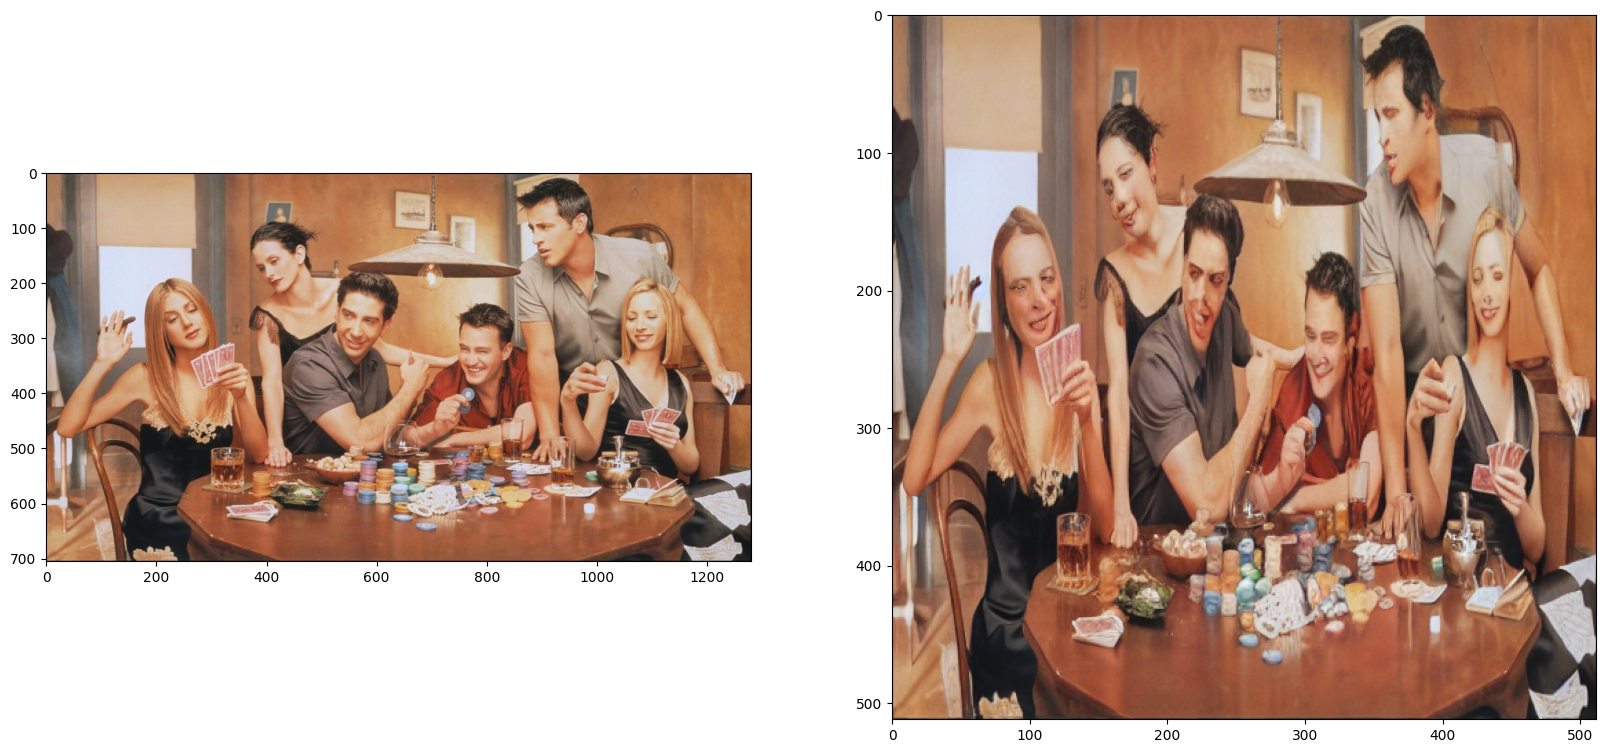

In [14]:
# compare with original

fig, ax = plt.subplots(1,2, figsize=(20,40))
ax[0].imshow(image)
ax[1].imshow(image_final)
plt.savefig('assets/friends-compare-sd-1.5.jpeg')
